# Hillipop with Planck 2018 data (NPIPE release)

## Preamble

This notebook make use of [GetDist](https://getdist.readthedocs.io/en/latest/) python package to plot and to analyse MCMC samples.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

Print versions used



In [5]:
import getdist
import matplotlib

getdist.chains.print_load_details = False

print("     Numpy :", np.__version__)
print("Matplotlib :", matplotlib.__version__)
print("   GetDist :", getdist.__version__)

     Numpy : 1.19.2
Matplotlib : 3.3.2
   GetDist : 1.1.2


We will use the `cobaya_utilities` module to ease some plotting like how the chains evolve

In [9]:
!pip install git+https://github.com/xgarrido/cobaya_utilities.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/xgarrido/cobaya_utilities.git to /tmp/pip-req-build-fq4cbz_y
  Created wheel for cobaya-utilities: filename=cobaya_utilities-0.1-py3-none-any.whl size=2024 sha256=df574ce1a633d046931fd5c8f515924f9b34964f47524d6d9a20f4bfead06c4e
  Stored in directory: /tmp/pip-ephem-wheel-cache-enk2_m53/wheels/98/f2/57/f89ecdf933c7a8433818b34ee98f16fdefc852485c7f1a71f2
Successfully built cobaya-utilities


## Definitions

Define CMB & nuisance parameter names.



In [2]:
# cosmo_params = ["cosmomc_theta", "logA", "ns", "ombh2", "omch2", "H0", "Alens", "tau"]
cosmo_params = ["theta_MC_100", "logA", "ns", "ombh2", "omch2", "H0", "tau"]
nuisance_params = [
    "Aplanck",
    "c0",
    "c1",
    "c3",
    "c4",
    "c5",
    "Aradio",
    "Adusty",
    "AdustTT",
    "AdustPP",
    "AdustTP",
    "Asz",
    "Acib",
    "Aksz",
    "Aszxcib",
]

Set a dictionnary holding the path to the MCMC chains and its name

In [3]:
mcmc_samples = {
    r"NPIPE": "data/hillipop_TTTEEE",
    r"NPIPE + $\alpha_\mathrm{pol}$": "data/hillipop_TTTEEE_a_pol",
    r"NPIPE + BAO + SH0ES": "data/TTTEEE_all_cosmo",
    r"NPIPE + BAO + SH0ES + $\alpha_\mathrm{pol}$": "data/TTTEEE_a_pol_all_cosmo",
}

## MCMC chains

Let's plot the chains size

In [10]:
from cobaya_utilities.tools import print_chains_size

print_chains_size(mcmc_samples.values(), list(mcmc_samples.keys()))

'<table>\n<thead>\n<tr><th>                                           </th><th style="text-align: right;">  mcmc 1</th><th style="text-align: right;">  mcmc 2</th><th style="text-align: right;">  mcmc 3</th><th style="text-align: right;">  mcmc 4</th><th style="text-align: right;">  total</th></tr>\n</thead>\n<tbody>\n<tr><td>NPIPE                                      </td><td style="text-align: right;">   57907</td><td style="text-align: right;">   57934</td><td style="text-align: right;">   59569</td><td style="text-align: right;">   62402</td><td style="text-align: right;"> 237812</td></tr>\n<tr><td>NPIPE + $\\alpha_\\mathrm{pol}$              </td><td style="text-align: right;">   56251</td><td style="text-align: right;">   66111</td><td style="text-align: right;">   58460</td><td style="text-align: right;">   61390</td><td style="text-align: right;"> 242212</td></tr>\n<tr><td>NPIPE + BAO + SH0ES                        </td><td style="text-align: right;">   26196</td><td style="text-align: right;">   25312</td><td style="text-align: right;">   28248</td><td style="text-align: right;">   22823</td><td style="text-align: right;"> 102579</td></tr>\n<tr><td>NPIPE + BAO + SH0ES + $\\alpha_\\mathrm{pol}$</td><td style="text-align: right;">   42383</td><td style="text-align: right;">   41313</td><td style="text-align: right;">   49783</td><td style="text-align: right;">   47224</td><td style="text-align: right;"> 180703</td></tr>\n</tbody>\n</table>'

Have a look at how chains evolve with time and check convergence or not.



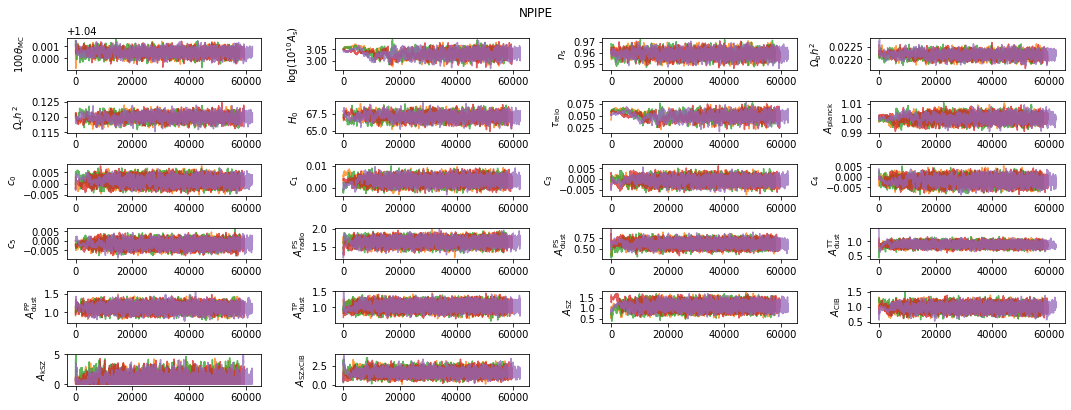

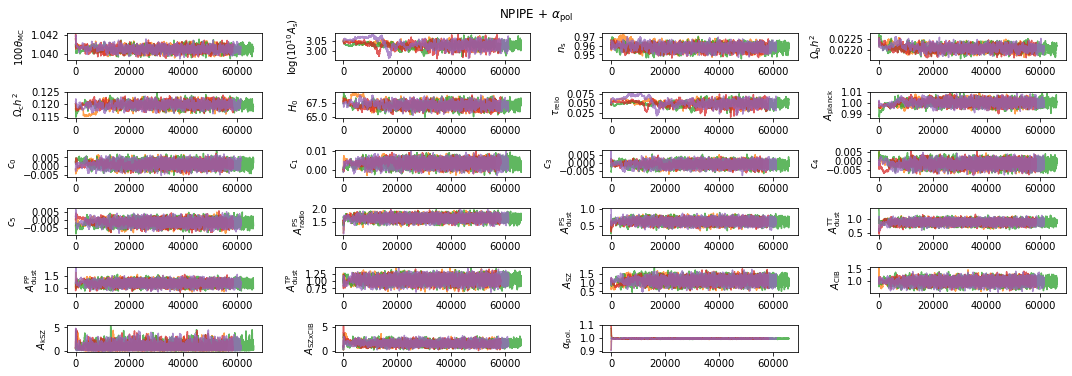

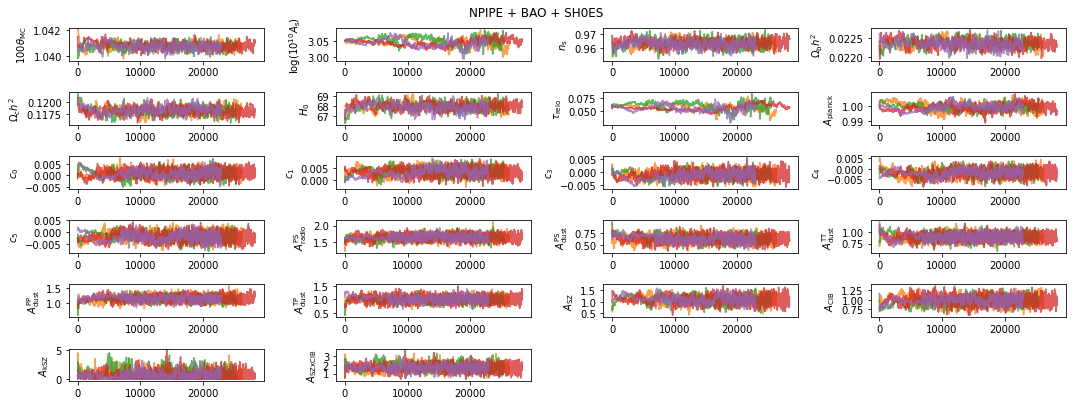

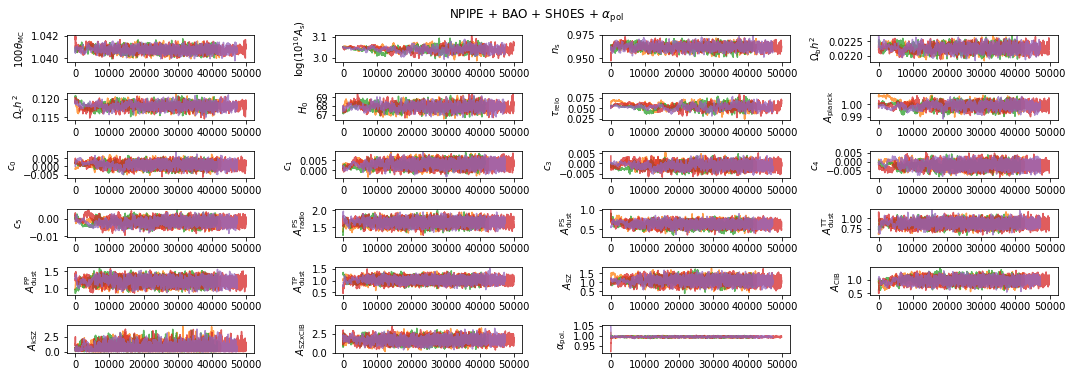

In [12]:
from cobaya_utilities.tools import plot_chains

for k, v in mcmc_samples.items():
    params = cosmo_params + nuisance_params
    if "a_pol" in v:
        params += ["a_pol"]
    plot_chains(v, params=params, title=k, ncol=4)

### TT likelihood

In [50]:
chains_dir = "./output/hlp_TT"
print_chains_size(chains_dir)

'<table>\n<thead>\n<tr><th style="text-align: right;">  mcmc 1</th><th style="text-align: right;">  mcmc 2</th><th style="text-align: right;">  mcmc 3</th><th style="text-align: right;">  mcmc 4</th><th style="text-align: right;">  total</th></tr>\n</thead>\n<tbody>\n<tr><td style="text-align: right;">  161361</td><td style="text-align: right;">  162604</td><td style="text-align: right;">  169193</td><td style="text-align: right;">  159843</td><td style="text-align: right;"> 653001</td></tr>\n</tbody>\n</table>'

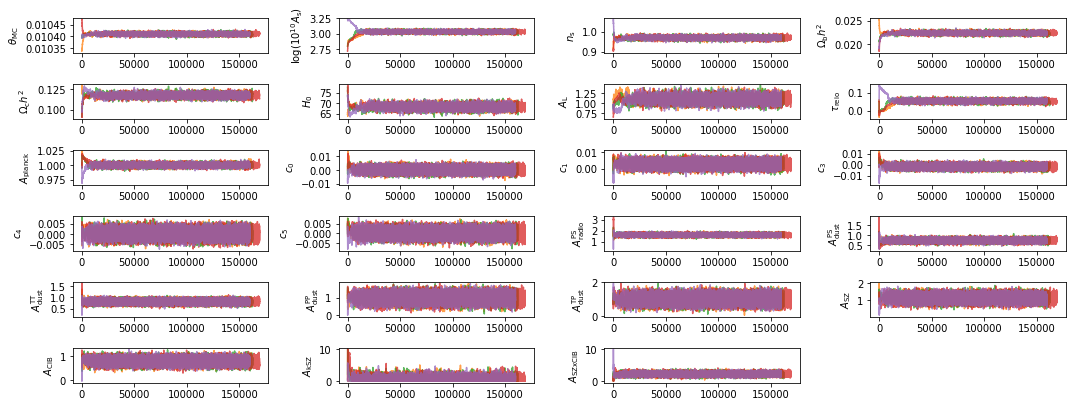

In [51]:
plot_chains(chains_dir, params=cosmo_params + nuisance_params, ncol=4)

## MCMC distributions



Define global plot settings



In [13]:
from getdist.plots import GetDistPlotSettings

plot_settings = GetDistPlotSettings()
plot_settings.num_plot_contours = 3
plot_settings.solid_colors = "tab10"
plot_settings.line_styles = "tab10"
plot_settings.legend_fontsize = 15

Load MCMC samples



In [14]:
from getdist import loadMCSamples

samples = [
    loadMCSamples(os.path.join(path, "mcmc"), settings={"ignore_rows": 0.4})
    for path in mcmc_samples.values()
]

Plot posteriors distributions of CMB parameters



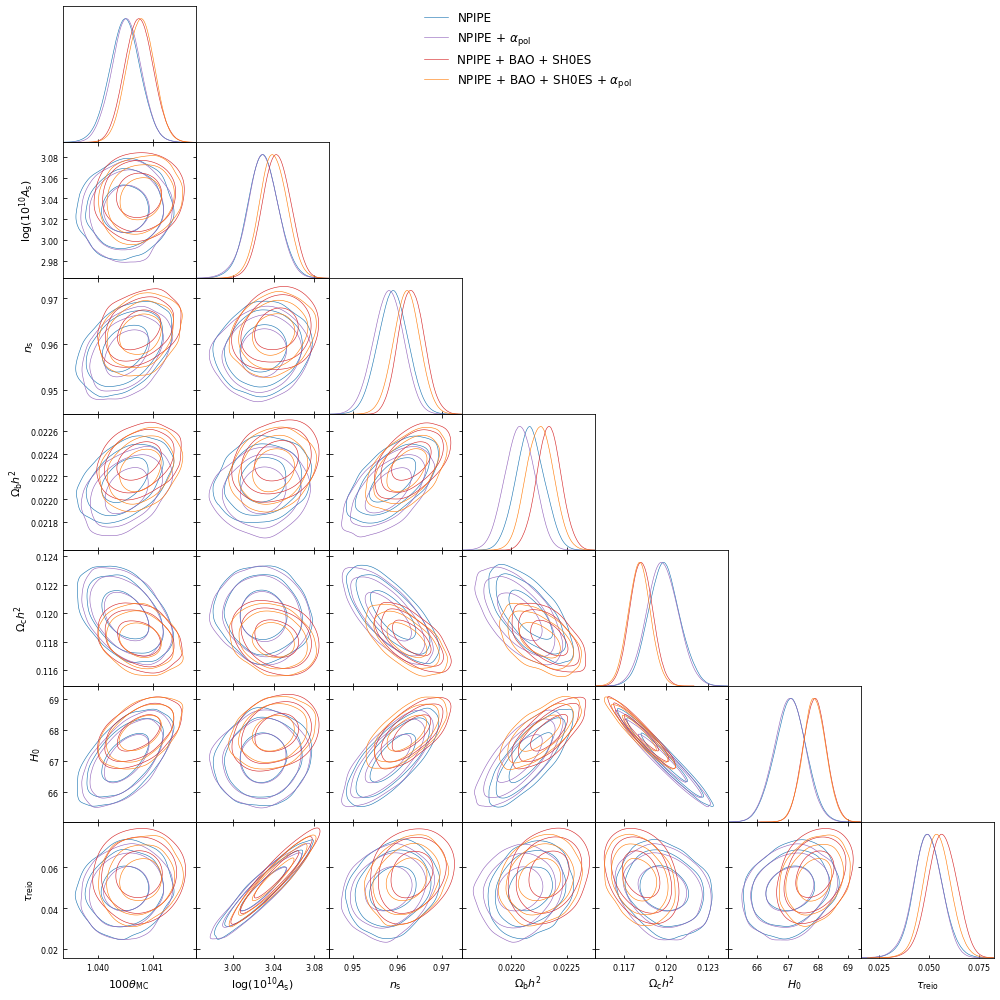

In [15]:
from getdist import plots

g = plots.get_subplot_plotter(settings=plot_settings)
colors = ["tab:blue", "tab:purple", "tab:red", "tab:orange"]
g.triangle_plot(
    samples,
    cosmo_params,
    filled=False,
    legend_labels=mcmc_samples.keys(),
    colors=colors,
    diag1d_kwargs={"colors": colors},
)
# # Show prior on tau
# ax = g.subplots[-1, -1]
# xmin, xmax, ymin, ymax = ax.axis()
# x = np.linspace(xmin, xmax, 100)
# from scipy.stats import norm

# ax.plot(x, 0.018 * norm.pdf(x, 0.054, 0.0073), color="gray", ls="--", label=r"$\tau$ prior")
# ax.legend(loc="upper left", bbox_to_anchor=(1, 1));

Plot posteriors distributions of nuisance parameters



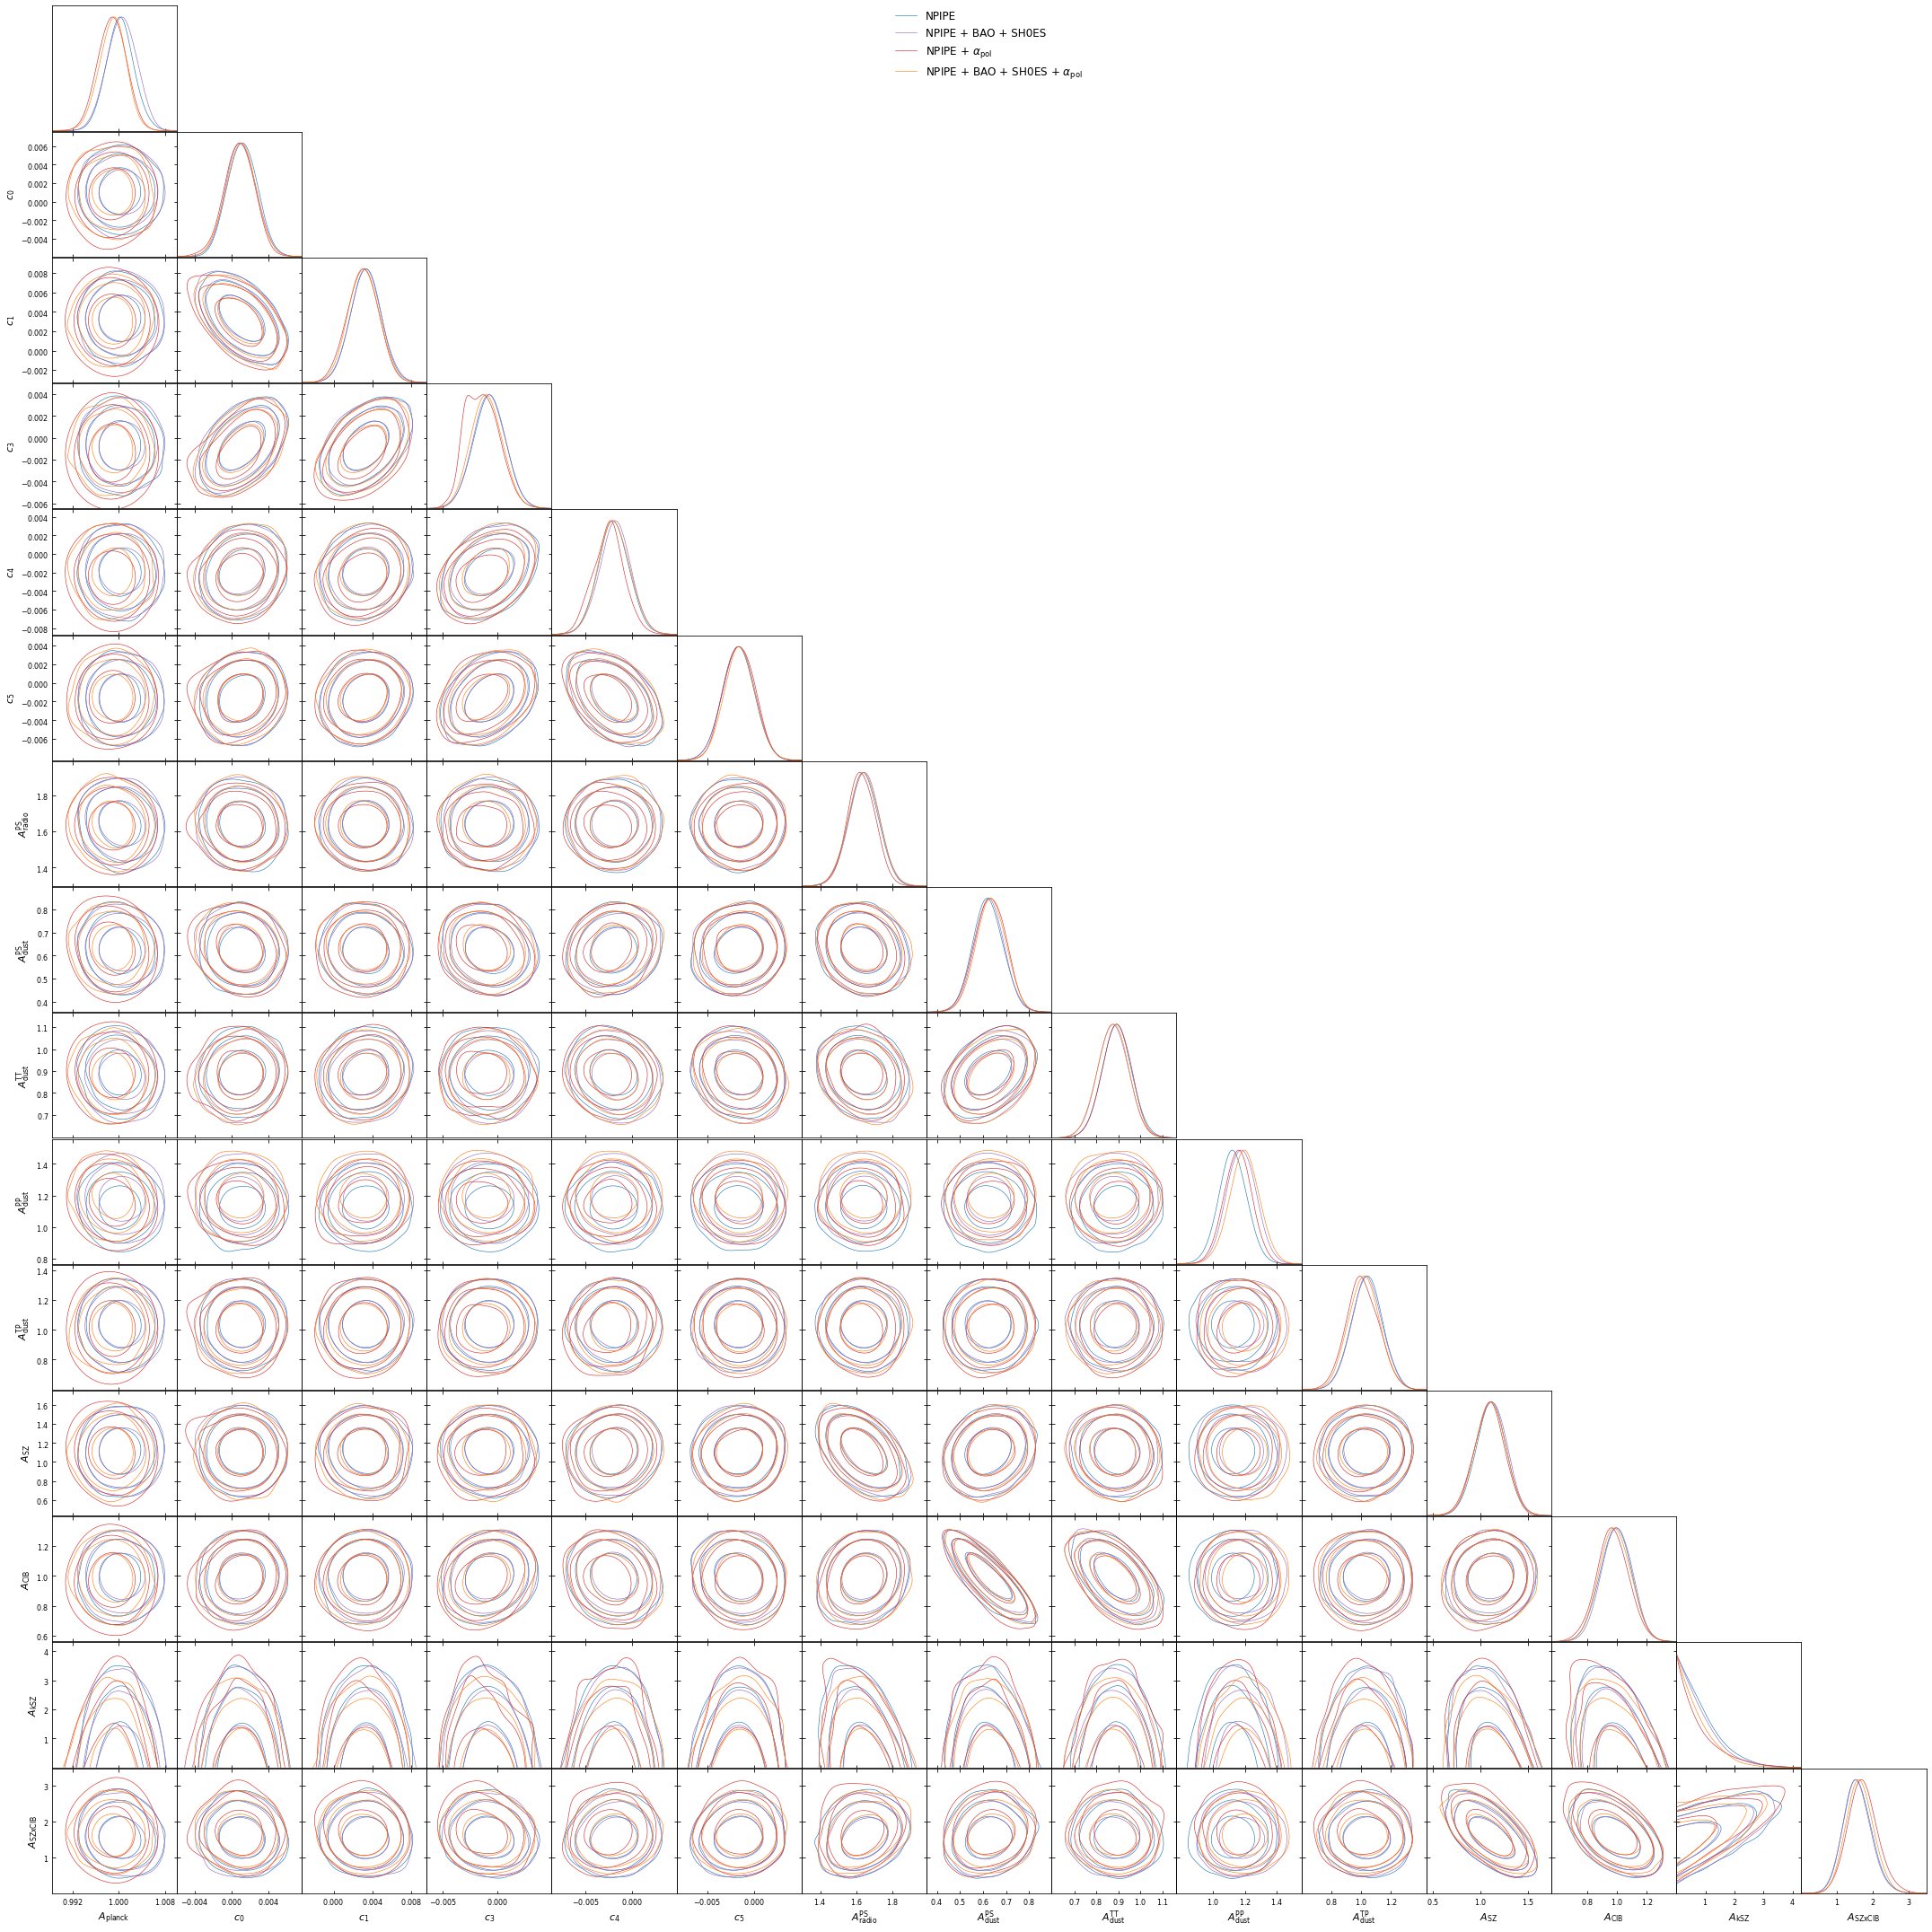

In [223]:
g.triangle_plot(
    samples,
    nuisance_params,
    filled=False,
    legend_labels=mcmc_samples.keys(),
    colors=colors,
    diag1d_kwargs={"colors": colors},
)

### Correlation plot



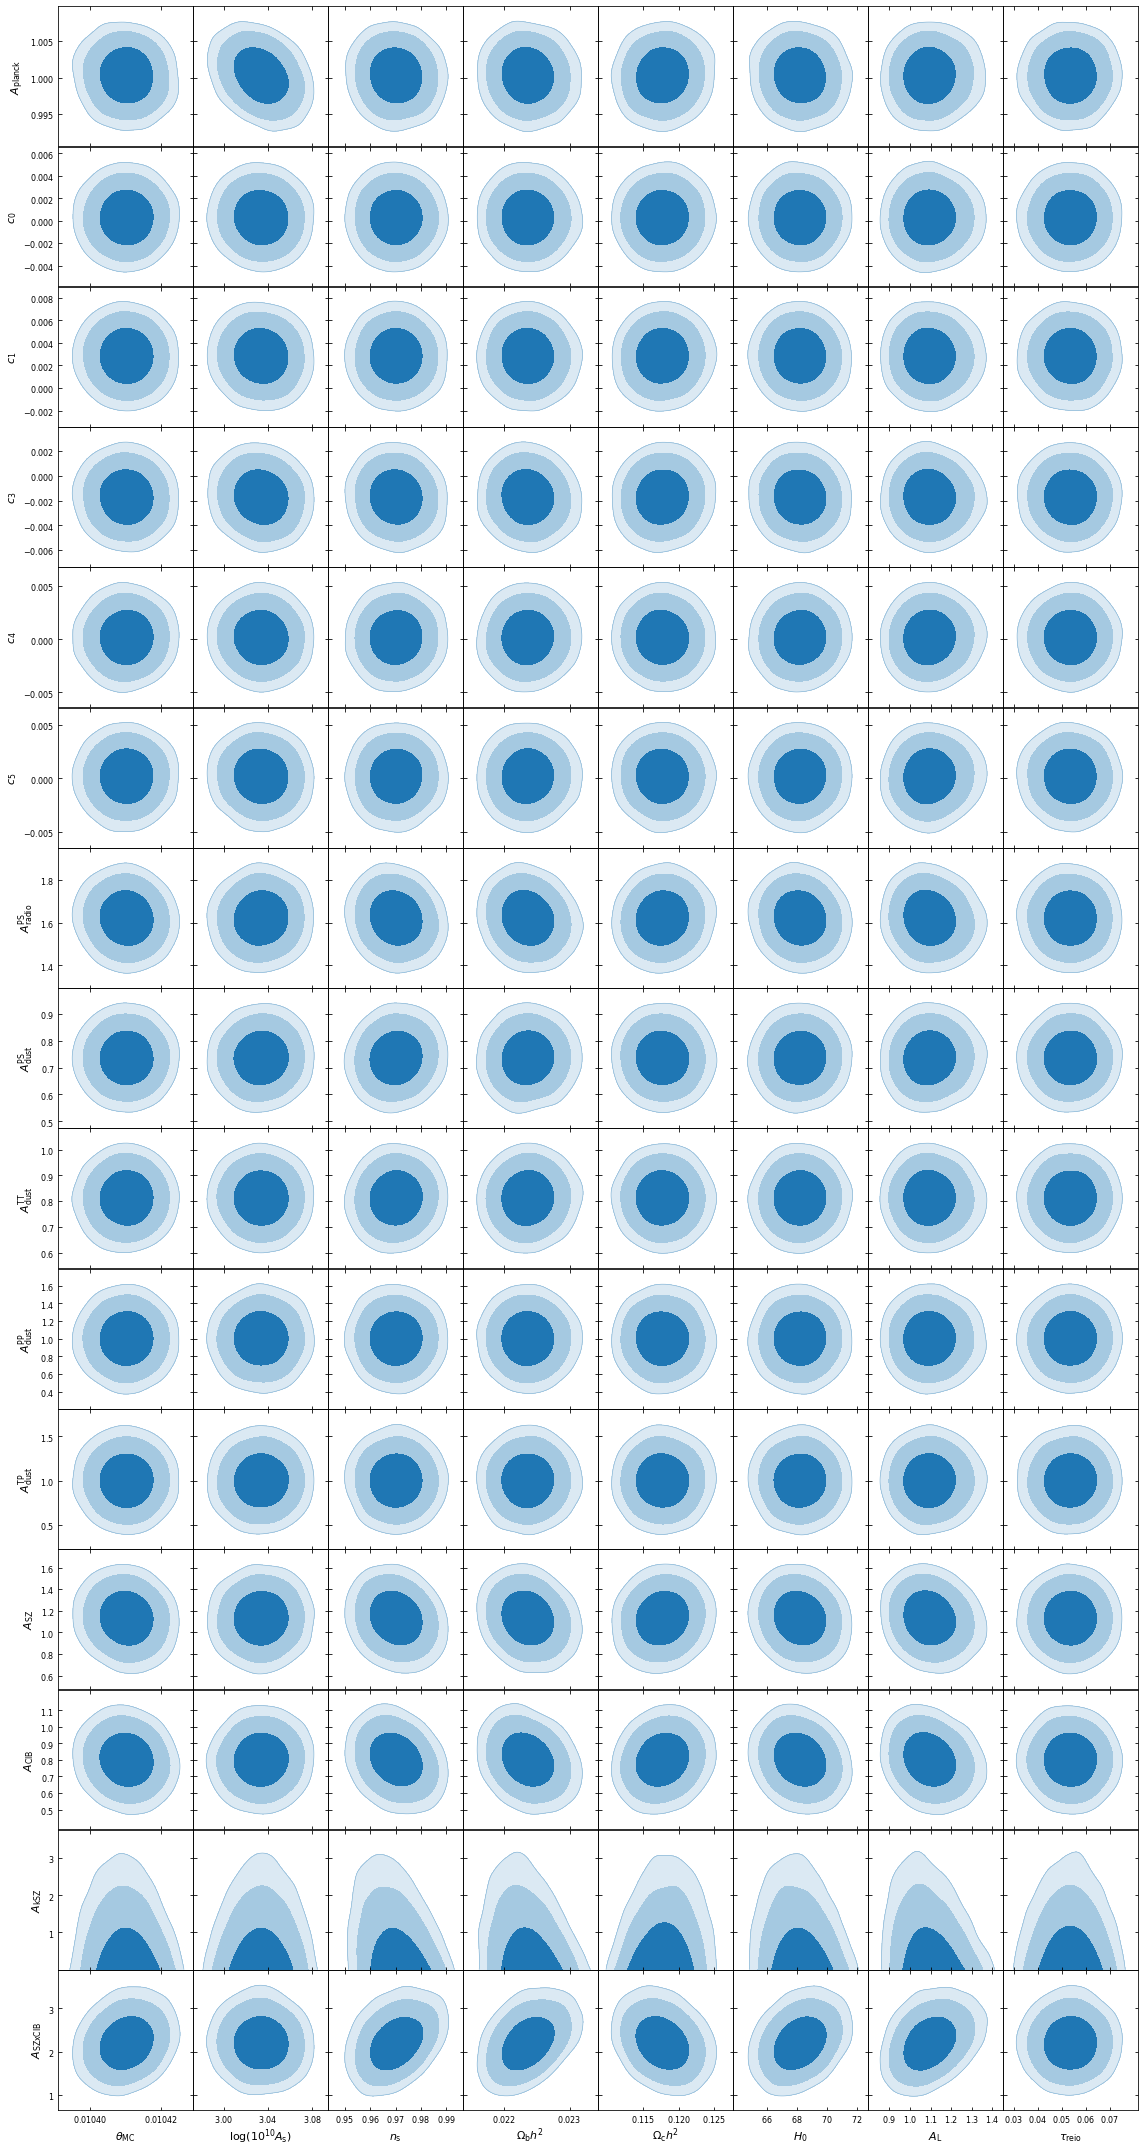

In [13]:
g.rectangle_plot(cosmo_params, nuisance_params, roots=samples, filled=True);

### Results

In [16]:
import ipywidgets as widgets

widgets.HBox(
    [
        widgets.Image(
            value=sample.getTable(
                limit=1, paramList=cosmo_params + nuisance_params + ["a_pol", "chi2"]
            )
            .tablePNG(dpi=150, bytesIO=True)
            .read()
        )
        for sample in samples
    ]
)